# Topic Vectors

An experiment in creating document topic vectors by TFIDF and PCA.

In [1]:
import json
from pathlib import Path

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
cd ..

/Users/christopherbare/Documents/personal/nlp-play


In [9]:
path = Path('./data/')

## Iterate documents

After scraping documents from Wikipedia, we'll have subdirectories for each topic. We use a generator to read the files and yield JSON documents.

In [25]:
def iter_pages(path):
    for d in path.iterdir():
        if d.is_dir():
            label = d.name
            for p in d.iterdir():
                with p.open() as f:
                    page = json.load(f)
                yield label, page

In [32]:
xs = [(label, page['title']) for label, page in iter_pages(path)]
labels = [x[0] for x in xs]
titles = [x[1] for x in xs]

In [33]:
len(titles)

90

In [34]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(page['extract'] for label, page in iter_pages(path))

In [35]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X.todense())

In [37]:
for label, title, yi in zip(labels, titles, Y):
    print(f'{label:16} {title:25} {yi[0]:10.4f} {yi[1]:10.4f}')

writers          Charles Dickens              -0.1315    -0.0989
writers          Isaac Asimov                 -0.0826     0.0088
writers          Neal Stephenson              -0.0335     0.0466
writers          Jane Austen                  -0.0997     0.0451
writers          Philip K. Dick               -0.1304    -0.0456
writers          Jorge Luis Borges            -0.1283    -0.0233
writers          Douglas Adams                -0.0663    -0.0380
writers          Edgar Allan Poe               0.0574     0.1970
writers          James Joyce                  -0.1168    -0.0655
writers          Kurt Vonnegut                -0.0647    -0.0187
writers          William Gibson               -0.1263    -0.0452
writers          George Orwell                -0.1405    -0.1448
writers          Don DeLillo                  -0.0820     0.0098
writers          Dave Eggers                  -0.0935     0.0221
writers          F. Scott Fitzgerald          -0.0409    -0.0269
writers          Ursula K

In [92]:
df = pd.DataFrame(Y, index=titles)
df['label'] = labels

In [93]:
colors = {'jazz_musicians': '#336699', 'scientists': '#339944', 'writers': '#CC3333'}

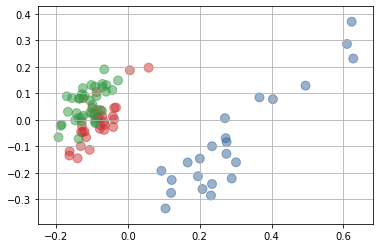

In [105]:
fig, ax = plt.subplots()
ax.scatter(x=df[0], y=df[1],
           c=[colors[label] for label in df['label']],
           s=80.0,
           alpha=0.5)
ax.grid(True)